## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.


[표분분산이 분산을 과소 평가하는 이유]
    
    호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
    이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
    표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.


### 데이터불러오기

In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [76]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [77]:
scores_df = pd.DataFrame({'score': scores}, 
                         index = pd.Index([i for i in 'ABCDEFGHIJ'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 데이터 중심의 지표

#### 평균값

In [78]:
#방법1

sum(scores)/len(scores)

55.0

In [79]:
#방법2

scores.mean(), scores_df.mean()

(55.0,
 score    55.0
 dtype: float64)

In [80]:
#방법3

np.mean(scores)

55.0

#### 중앙값

In [81]:
#방법1

sorted_scores = sorted(scores)   #정렬방법1
sorted_scores = np.sort(scores)  #정렬방법2

n = len(sorted_scores)

if n//2 == 0:
    median = sorted_scores[int(n/2+1)]
else:
    m1 = sorted_scores[int((n-1)/2)]
    m2 = sorted_scores[int((n+1)/2)]
    median = (m1+m2)/2
    
median

56.5

In [82]:
#방법2

scores_df.median()

score    56.5
dtype: float64

In [83]:
#방법3

np.median(sorted_scores)

56.5

#### 최빈값

In [84]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [85]:
pd.Series([1,2,3,4,5,6]).mode()

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

### 데이터의 산포도 지표

#### 편차
- 각 데이터가 평균으로부터 어느정도 떨어져 있는가를 나타내는 지표

In [86]:
#방법1

mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [87]:
## 편차의 평균
np.mean(deviation)

0.0

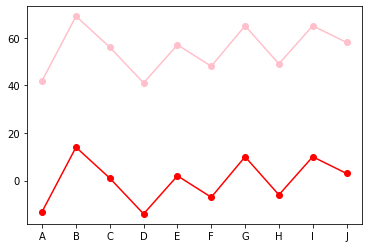

In [88]:
## raw 값과 편차 값을 도표화

import matplotlib.pyplot as plt

summary_df = scores_df.copy()
summary_df['deviation'] = deviation

plt.plot(summary_df['score'], marker = 'o', color = 'pink')
plt.plot(summary_df['deviation'], marker = 'o', color = 'red')

In [89]:
## 데이터프레임의 평균

summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산
- 편차의 제곱
- 편차의 평균이 항상 0이 되는 것 때문에 사용하는 지표

In [90]:
# 방법1

np.var(scores)

86.0

In [91]:
# 방법2

np.mean(deviation**2)

86.0

In [92]:
# 방법3

scores_df.var(ddof = 0)   # pandas var함수의 default는 불편분산임
                          # 따라서, ddof = 0으로 표본분산을 계산하도록 함

score    86.0
dtype: float64

In [93]:
# 방법4

summary_df['square of deviation'] = np.square(deviation)
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차
- 분산의 양의 제곱근
- raw 데이터의 단위와 통일해주기 위한 지표

In [94]:
# 방법1

np.sqrt(np.var(scores, ddof = 0))

9.273618495495704

In [95]:
# 방법2

np.std(scores, ddof = 0)

9.273618495495704

#### 범위
- 데이터 전체가 아닌 최댓값, 최솟값으로 산포도를 표현
- 최댓값-최솟값

In [96]:
np.max(scores) - np.min(scores)

28

#### 사분위범위
- 75% 상위수에 위치하는 값과 25% 하위수에 위치하는 값의 차이를 취함
- Q3-Q1

In [97]:
# 방법1

scores_q1 = np.percentile(scores, 25)
scores_q3 = np.percentile(scores, 75)
scores_iqr = scores_q3 - scores_q1
scores_iqr

15.0

In [98]:
# 방법2

scores_des = pd.Series(scores).describe()
scores_des['75%'] - scores_des['25%']

15.0

### 과제

#### 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하기

In [99]:
import numpy as np
import random

arr = np.array(np.random.randint(0,100,20))

print(f'배열의 평균: {arr.mean().round(1)}')
print(f'배열의 편차: {(arr - arr.mean()).round(1)}')
print(f'편차의 합: {(arr - arr.mean()).sum().round(1)}')

배열의 평균: 50.6
배열의 편차: [ 16.5  -6.5  40.4  19.5 -16.5 -39.6  19.5  26.4  33.4 -40.6  -6.5 -15.5
  42.4 -41.6  17.5 -50.6  38.4 -49.6  12.5   0.5]
편차의 합: 0.0


#### 중앙값 > 평균값인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하기

In [100]:
#중앙값 > 평균값
arr1 = np.array([-100,1,1,1,2,2,2,2,3])
print(np.median(arr1), np.mean(arr1))


#중앙값 < 평균값
arr2 = np.array([1,2,3,3,4,4,4,5,100])
print(np.median(arr2), np.mean(arr2))   

2.0 -9.555555555555555
4.0 14.0


#### 4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하기

In [101]:
arr = np.array([0.1,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,5,5,6,6,6,20])

arr_q1 = np.percentile(arr, 25)
arr_q3 = np.percentile(arr, 75)
arr_iqr = arr_q3 - arr_q1
lower_whisker = arr_q1 - 1.5*arr_iqr
upper_whisker = arr_q3 + 1.5*arr_iqr

print(f'1분위수: {arr_q1}')
print(f'3분위수: {arr_q3}')
print(f'사분위범위: {arr_iqr}')
print(f'{lower_whisker} 보다 작은 수, {upper_whisker} 보다 큰 수는 이상치로 분류됨')

outlier = []
for i in arr:
    if i < lower_whisker or i > upper_whisker:
        outlier.append(i)
        
print(f'이상치: {outlier}')

1분위수: 1.5
3분위수: 4.5
사분위범위: 3.0
-3.0 보다 작은 수, 9.0 보다 큰 수는 이상치로 분류됨
이상치: [20.0]


<AxesSubplot:xlabel='arr'>

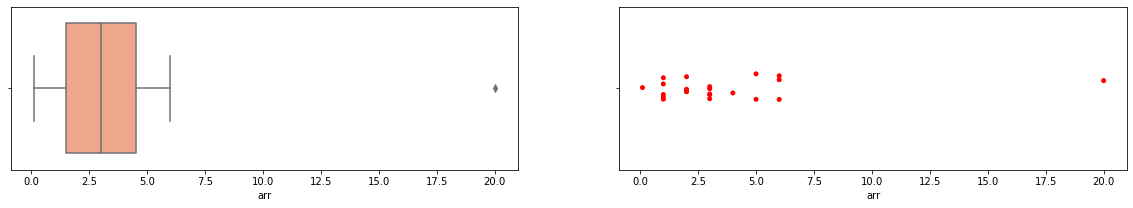

In [102]:
# 시각화

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(columns = ['arr'])
df['arr'] = arr

fig, ax = plt.subplots(1,2, figsize = (20,3))
sns.boxplot('arr', data = df, ax = ax[0], color = 'lightsalmon')
sns.stripplot('arr', data = df, ax = ax[1], color = 'red')

#### 표본분산과 불편분산의 차이를 사례를 들어 설명하기

In [103]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


In [104]:
df_1 = df['english']
df_2 = df['mathematics']

<b>1. 표본분산</b>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fd9lrbo%2FbtqDnwhttDQ%2FGpyLIK1ENoaLAR4rgEVuuK%2Fimg.png">

<b>2. 불편분산(비편향분산)</b>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FRFAbv%2FbtqDmWAM3DP%2Fq2A9mSkKqBm6rZ17xPT4Fk%2Fimg.png">

참고:https://1992jhlee.tistory.com/19

In [105]:
# 표본분산 s^2 = 1/n* Σ(xi-xm)^2

print(df_1.var(ddof = 0))   # pandas var함수의 default는 불편분산임. 따라서, ddof = 0으로 표본분산을 계산하도록 함
print(df_2.var(ddof = 0))   

94.11560000000001
69.38559999999995


In [106]:
print((1/(len(df_1)))*((df_1 - df_1.mean())*(df_1 - df_1.mean())).sum())
print((1/(len(df_2)))*((df_2 - df_2.mean())*(df_2 - df_2.mean())).sum())

94.1156
69.38560000000001


In [107]:
print(np.var(df_1, ddof = 0))
print(np.var(df_2, ddof = 0))

94.11560000000001
69.38559999999995


In [108]:
# 불편분산: 1/(n-1)* Σ(xi-xm)^2 
## 표본 분산은 표본에서 계산된 분산
## 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아짐
## 즉, 표본 분산이 모집단 분산에 맞춰서 동일하게 보정 한 것을 비편향 분산(불편분산)이라 함

print(df_1.var(ddof = 1))   # pandas var함수의 default는 불편분산
print(df_2.var(ddof = 1))

96.03632653061226
70.80163265306118


In [109]:
print((1/(len(df_1)-1))*((df_1 - df_1.mean())*(df_1 - df_1.mean())).sum())
print((1/(len(df_2)-1))*((df_2 - df_2.mean())*(df_2 - df_2.mean())).sum())

96.03632653061223
70.80163265306122


In [110]:
print(np.var(df_1, ddof = 1))
print(np.var(df_2, ddof = 1))

96.03632653061226
70.80163265306118


### 데이터의 정규화

In [123]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [124]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [125]:
scores_df = pd.DataFrame({'score':scores},
                          index = pd.Index([i for i in 'ABCDEFGHIJ'], 
                                           name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


#### 표준화
- 데이터를 비교가 용이하도록 통일된 지표로 변환하는 것
- z = (rawdata - 평균)/ 표준편차 ~ N(0,1)

In [129]:
#표준화 변량, z-score 구하기

z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [132]:
# 표준화 변량의 평균 및 표준편차 구하기

np.mean(z), np.std(z)     

(-1.6653345369377347e-17, 0.9999999999999999)

In [133]:
# 표준화 변량의 평균 및 불편표준편차 구하기

np.mean(z), np.std(z, ddof = 1)

(-1.6653345369377347e-17, 1.0540925533894596)

#### 편찻값
- 평균이 50, 표준편차가 10이 되도록 정규화한 값
- z = 50 + 10*(rawdata - 평균)/표준편차 ~ N(50,10^2)

In [134]:
z2 = 50 + 10*z
z2

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [135]:
# 표준화 변량의 평균 및 표준편차 구하기

np.mean(z2), np.std(z2)     

(50.0, 10.000000000000002)

In [138]:
# 표준화 변량의 평균 및 불편표준편차 구하기

np.mean(z2), np.std(z2, ddof = 1)     

(50.0, 10.5409255338946)

### 1차원 데이터의 시각화

#### 도수분포표
- 분할된 구간과 데이터의 개수를 표로 정리한 것
- np.histogram(bins = n, range = (min,max)) 함수 사용


- 계급: 구간
- 계급값: 계급을 대표하는 값으로, 구간 내 중앙값을 말함
- 상대도수: 전체 도수에서 해당 계급의 데이터가 차지하는 비율
- 누적상대도수: 해당 계급까지의 상대도수의 합 
                np.cumsum 함수 사용

##### 영어성적을 가지고 도수분포표 작성하기

In [188]:
# step = 구간, freq = 데이터 개수

freq, step = np.histogram(df['english'], bins = 10, range = (0 ,100))
freq, step

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [182]:
# 도수분포표 데이터프레임화

freq_class = [f'{int(step[i])} ~ {int(step[i+1])}' for i in range(10)]

freq_dist_df = pd.DataFrame({'frequency': freq,},
                             index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [183]:
#계급값

class_value = []
for i in range(10):
    class_value.append(int((step[i+1]-step[i])/2+step[i]))

freq_dist_df['class_value'] = class_value
freq_dist_df

,frequency,class_value
class,,
0 ~ 10,0,5
10 ~ 20,0,15
20 ~ 30,0,25
30 ~ 40,2,35
40 ~ 50,8,45
50 ~ 60,16,55
60 ~ 70,18,65
70 ~ 80,6,75
80 ~ 90,0,85


In [184]:
# 상대도수

relative_freq = freq/freq.sum()
freq_dist_df['relative frequency'] = relative_freq
freq_dist_df

,frequency,class_value,relative frequency
class,,,
0 ~ 10,0,5,0.00
10 ~ 20,0,15,0.00
20 ~ 30,0,25,0.00
30 ~ 40,2,35,0.04
40 ~ 50,8,45,0.16
50 ~ 60,16,55,0.32
60 ~ 70,18,65,0.36
70 ~ 80,6,75,0.12
80 ~ 90,0,85,0.00


In [185]:
# 누적 상대도수

cumsum_relative_freq = np.cumsum(relative_frequency)
freq_dist_df['cumulative relative freequency'] = cumsum_relative_freq
freq_dist_df

,frequency,class_value,relative frequency,cumulative relative freequency
class,,,,
0 ~ 10,0,5,0.00,0.00
10 ~ 20,0,15,0.00,0.00
20 ~ 30,0,25,0.00,0.00
30 ~ 40,2,35,0.04,0.04
40 ~ 50,8,45,0.16,0.20
50 ~ 60,16,55,0.32,0.52
60 ~ 70,18,65,0.36,0.88
70 ~ 80,6,75,0.12,1.00
80 ~ 90,0,85,0.00,1.00


In [187]:
#최종 데이터프레임

freq_dist_df = freq_dist_df[['class_value','frequency','relative frequency', 'cumulative relative freequency']]
freq_dist_df

,class_value,frequency,relative frequency,cumulative relative freequency
class,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


#### 히스토그램
- 도수분포표를 막대그래프로 나타낸 것

#####  영어성적을 가지고 히스토그램 만들기
i) 계급폭을 10으로 한 경우

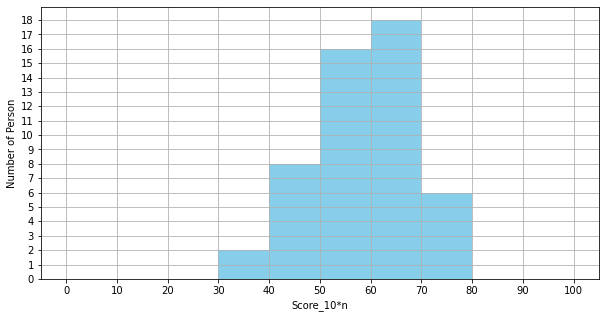

In [222]:
import matplotlib.pyplot as plt

# 그래프 사이즈 설정
fig = plt.figure(figsize = (10,5))

# subplot 개수 설정(행개수, 열개수, 위치)
ax = fig.add_subplot(111)

# 격자 생성
axes = plt.gca()
axes.xaxis.grid(True)
axes.yaxis.grid(True)

# 히스토그램 그리기
freq, step, _ = ax.hist(df['english'], bins = 10, range = (0,100), color = 'skyblue')

ax.set_xlabel('Score_10*n')
ax.set_ylabel('Numbers of Person')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,max(freq)+1))


plt.show()   #이상한 잡다구리한 설명 삭제됨

#####  영어성적을 가지고 히스토그램 만들기
i) 계급폭을 4으로 한 경우

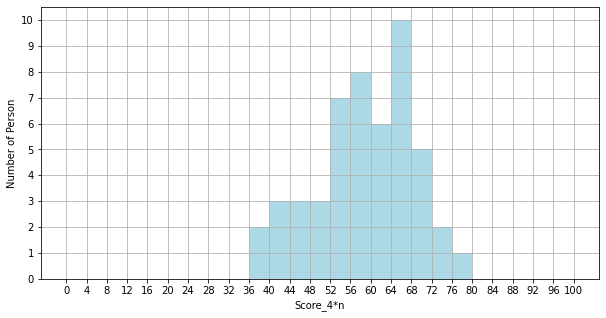

In [227]:
import matplotlib.pyplot as plt

#그래프 사이즈 설정
fig = plt.figure(figsize = (10,5))

# subplot 개수 설정(행개수, 열개수, 위치)
ax = fig.add_subplot(111)

# 격자 생성
axes = fig.gca()
axes.xaxis.grid(True)
axes.yaxis.grid(True)

# 히스토그램 그리기
freq, step, _ = ax.hist(df['english'], bins = 25, range = (0,100), color = 'lightblue')

ax.set_xlabel('Score_4*n')
ax.set_ylabel('Numbers of Person')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,max(freq)+1))

plt.show()

##### 누적 꺾은선 그래프 그리기

**Markers**
```
=============   ===============================
character       description
=============   ===============================
``'.'``         point marker
``','``         pixel marker
``'o'``         circle marker
``'v'``         triangle_down marker
``'^'``         triangle_up marker
``'<'``         triangle_left marker
``'>'``         triangle_right marker
``'1'``         tri_down marker
``'2'``         tri_up marker
``'3'``         tri_left marker
``'4'``         tri_right marker
``'8'``         octagon marker
``'s'``         square marker
``'p'``         pentagon marker
``'P'``         plus (filled) marker
``'*'``         star marker
``'h'``         hexagon1 marker
``'H'``         hexagon2 marker
``'+'``         plus marker
``'x'``         x marker
``'X'``         x (filled) marker
``'D'``         diamond marker
``'d'``         thin_diamond marker
``'|'``         vline marker
``'_'``         hline marker
=============   ===============================
```

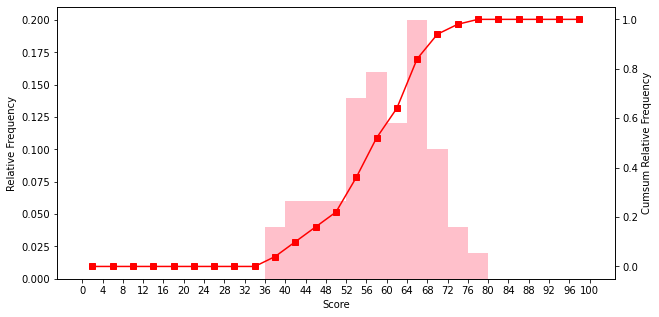

In [272]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(111)
# ax2: y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램 그리기
## weights: 도수에 가중치를 주는 것
## 1로 구성된 원소 배열을 df['english']요소의 개수만큼 만들어주고 가중치로 부여
weights = np.ones_like(df['english'])/len(df)
rel_freq, step, _ = ax1.hist(df['english'], bins = 25, range = (0,100), weights = weights, color = 'pink')

# 누적 상대도수의 꺾은선그래프 그리기
## x축값: 계급값
class_value = [ (i+(i+4))//2 for i in range(0, 100, 4)]
## y축값: 누적상대도수 
cum_rel_freq = np.cumsum(rel_freq)

ax2.plot(class_value, cum_rel_freq, marker = 's', color = 'red')


ax1.set_xlabel('Score')
ax1.set_ylabel('Relative Frequency')
ax1.set_xticks(np.linspace(0,100,25+1))
ax2.set_ylabel('Cumsum Relative Frequency')

plt.show()

##### Box plot 그리기
- 데이터의 산포도를 나타내는 plot
- 사분위범위와 이상값
    * IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
    * lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
    * upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
    * 이상치: lower whisker, upper whisker를 벗어나는 값



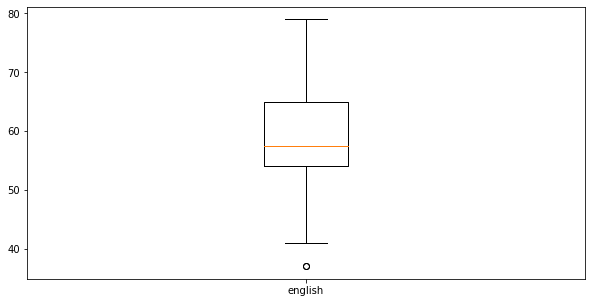

In [276]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(111)
ax.boxplot(df['english'], labels = ['english'])

plt.show()

## 2차원 데이터

### 두 데이터 사이의 관계를 나타내는 지표

In [294]:
import numpy as np
import pandas as pd

df = pd.read_csv('ch2_scores_em.csv')

en_scores = np.array(df['english'][:10])
ma_scores = np.array(df['mathematics'][:10])
scores_df = pd.DataFrame({'english': en_scores,
                          'math': ma_scores},
                          index = pd.Index([i for i in 'ABCDEFGHIJ'], name = 'student'))
scores_df

,english,math
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


#### (미리)산점도

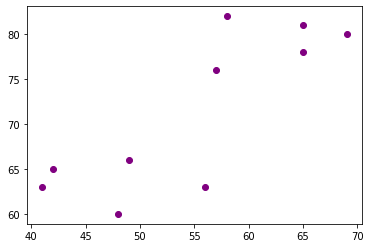

In [295]:
plt.scatter(scores_df['english'], scores_df['math'], color = 'purple')

#### 공분산
- Sxy = 1/n* Σ(Xi-Xm)*(Yi-Ym)
- np.cov(x, y, ddof = 0) 함수
    - 반환값은 행렬
    - 공분산: [0,1], [1,0]
    - x분산:[0,0], y분산:[1,1]

In [312]:
# 공분산 구하기
# 방법1

cov_map = np.cov(scores_df['english'], scores_df['math'], ddof = 0).round(2)


print(cov_map)
print('\n')
print(f'영어 성적의 표본분산: {cov_map[0,0]}')
print(f'수학 성적의 표본분산: {cov_map[1,1]}')
print(f'영어성적과 수학성적의 공분산: {cov_map[0,1]}')

[[86.   62.8 ]
 [62.8  68.44]]


영어 성적의 표본분산: 86.0
수학 성적의 표본분산: 68.44
영어성적과 수학성적의 공분산: 62.8


In [311]:
# 분산을 따로 구해보기

print(np.var(scores_df['english']))
print(np.var(scores_df['math']))

86.0
68.44000000000001


In [322]:
# 공분산 구하기
# 방법2

cov_map = scores_df.cov(ddof = 0)
display(cov_map)

print('\n')
print(f'영어 성적의 표본분산: {cov_map.iloc[0,0].round(1)}')
print(f'수학 성적의 표본분산: {cov_map.iloc[1,1].round(1)}')
print(f'영어성적과 수학성적의 공분산: {cov_map.iloc[0,1].round(1)}')

,english,math
english,86.0,62.80
math,62.8,68.44




영어 성적의 표본분산: 86.0
수학 성적의 표본분산: 68.4
영어성적과 수학성적의 공분산: 62.8


#### 상관계수
- rxy = Sxy / (Sx*Sy)
- -1 < rxy < 1
- np.corrcoef(x,y) 함수, corr() 함수
    - 상관계수: [0,1], [1,0]

In [332]:
# 방법1: Sxy/(Sx*Sy) 직접 구하기

(np.cov(scores_df['english'], scores_df['math'], ddof = 0)[0,1]/(np.std(scores_df['english'])*np.std(scores_df['math']))).round(2)

0.82

In [333]:
# 방법2: np.corrcoef 함수 사용

np.corrcoef(scores_df['english'], scores_df['math']).round(2)

array([[1.  , 0.82],
       [0.82, 1.  ]])

In [334]:
# 방법3: corr() 함수 사용

scores_df.corr().round(2)

,english,math
english,1.00,0.82
math,0.82,1.00


### 2차원 데이터 시각화

In [342]:
df = pd.read_csv('ch2_scores_em.csv')
df_english = np.array(df['english'])
df_math = np.array(df['mathematics'])

#### 산점도

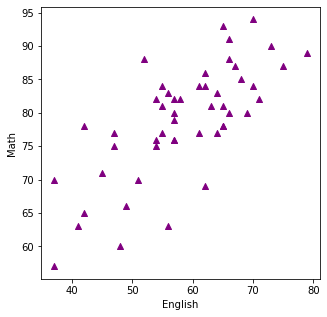

In [348]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))

ax = fig.add_subplot(111)

#산점도 그리기
ax.scatter(df_english, df_math, marker = '^', color = 'purple')

ax.set_xlabel('English')
ax.set_ylabel('Math')

plt.show()

#### 회귀직선
- y  = B0 + B1*x
- np.polyfit함수, np.poly1d함수

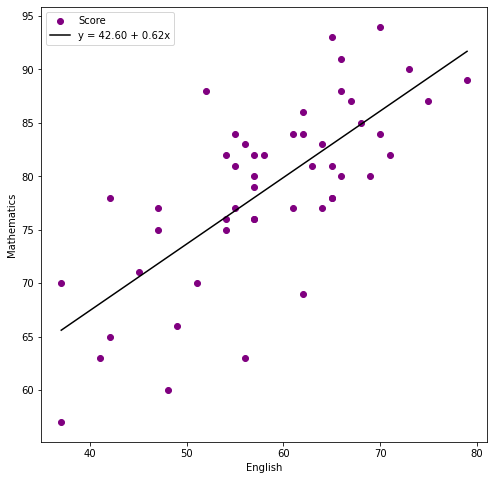

In [360]:
# B0, B1 계수 구하기
poly_fit = np.polyfit(df_english, df_math, 1)

# B0 + B1*x 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)

# 직선 그리기
## x축
xs = np.linspace(df_english.min(), df_english.max())
## y축
ys = poly_1d(xs)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

# 산점도 그리기
ax.scatter(df_english, df_math, marker = "o", label = "Score", color = "purple")
# 회귀직선 그리기
ax.plot(xs, ys, color = "black", label = f'y = {poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')

ax.set_xlabel('English')
ax.set_ylabel('Mathematics')

# 범례표시
ax.legend(loc = "upper left")

plt.show()

#### polyfit 함수 사용법
- poly(x,y,차수) 형태

In [48]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 1차원 회귀식 계수 생성: Y = B0 + B1X
poly = np.polyfit(x,y,1)
print(poly)

b0 = poly[1]
b1 = poly[0]

# 회귀식 작성
y = f'y = {b0:.2f} + {b1:.2f}*x'
print(y)

[ 3.31428571 -3.6       ]
y = -3.60 + 3.31*x


##### 1차원 회귀식
np.polyfit(x,y,<span style = 'color:red'>1</span>)

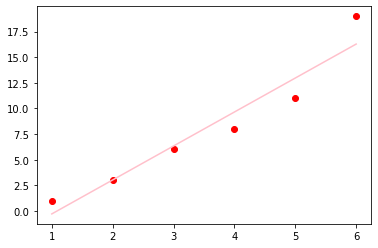

In [82]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 1차원 회귀계수 구하기
## 회귀식: Y = B0 + B1X
poly = np.polyfit(x,y,1)


# 회귀계수로 y예측값 만들기
y_pred = np.array(x) * poly[0] + poly[1]


#시각화
plt.plot(x,y_pred, color = 'pink')   # 직선은 예측값으로
plt.scatter(x,y,color = 'red')    # 산점도는 실제값으로 
plt.show()

##### 2차원 회귀식
np.polyfit(x,y,<span style = 'color:red'>2</span>)

[ 0.53571429 -0.43571429  1.4       ]


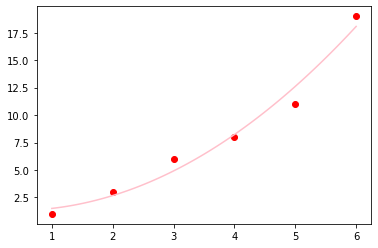

In [60]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 2차원 회귀계수 만들기
## 회귀식: Y = B0 + B1X + B2X^2
poly = np.polyfit(x,y,2)
print(poly)   # [B2, B1, B0]


# 시각화
## 곡선을 완만하게 그리기 위해 X값을 세분화
x_line = np.linspace(1,6,100)   
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]


plt.plot(x_line,y_pred, color = 'pink')   # 예측값은 곡선으로
plt.scatter(x, y, color = 'red')       #실제값은 산점도로
plt.show()

##### 5차원 회귀식
np.polyfit(x,y,<span style = 'color:red'>5</span>)

[ -0.01666667   0.41666667  -3.41666667  12.08333333 -16.06666667
   8.        ]


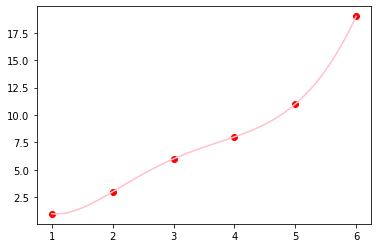

In [87]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 5차원 회귀계수 만들기: Y = B0 + B1X + B2X^2 + B3X^3 + B4X^4 + B5X^5
poly = np.polyfit(x,y,5)
print(poly)   # [B5, B4, B3, B2, B1, B0]


#시각화

## 곡선을 완만하게 그리기 위해 X값을 세분화
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line)

## 배열은 전체값을 알아서 계산해줌. 따로 요소값마다 돌리는 다중 for문 안돌려도됨
for i in range(6):
    y_pred += x_line**(5-i)*poly[i]  

plt.plot(x_line, y_pred, color = 'pink')
plt.scatter(x,y, color = 'red')

- <b> <span style = 'color:red'> 차원이 높아질 수록, 예측률을 높아지지만 과적합 문제가 생김.</span></b>
- <b> <span style = 'color:red'> 일반화할 수 없어짐.</span></b>

#### 히트맵

In [365]:
df_english.min(), df_english.max()

(37, 79)

In [366]:
df_math.min(), df_math.max()

(57, 94)

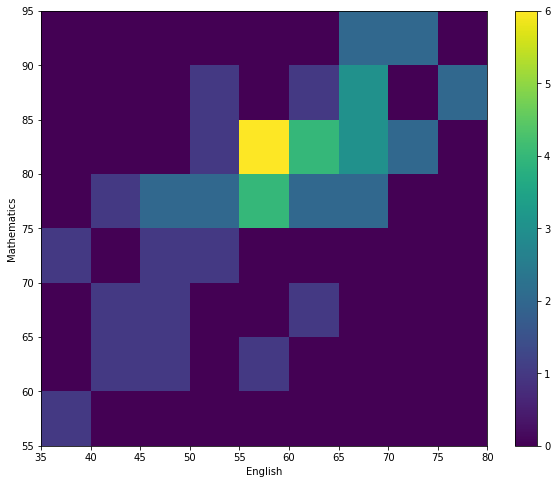

In [364]:
fig = plt.figure(figsize = (10,8))

ax = fig.add_subplot(111)


## 각 배열의 최소, 최댓값과 가까운 값으로 구간을 정해줌
c = ax.hist2d(df_english, df_math,
              bins = [9,8], range = [(35,80), (55,95)])    

ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러바 표시
fig.colorbar(c[3], ax = ax)

plt.show()

### 과제

#### 일차원 데이터를 생성해서  다음을 수행
- 도수분포표를 만들고 히스토그램으로 시각화하세요
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요

,freq
petal length,
0 ~ 1 cm,0
1 ~ 2 cm,50
2 ~ 3 cm,0
3 ~ 4 cm,11
4 ~ 5 cm,43
5 ~ 6 cm,35
6 ~ 7 cm,11
7 ~ 8 cm,0


,freq,relative freq,cumulative relative freq
petal length,,,
0 ~ 1 cm,0,0.000000,0.00
1 ~ 2 cm,50,0.333333,0.33
2 ~ 3 cm,0,0.000000,0.33
3 ~ 4 cm,11,0.073333,0.41
4 ~ 5 cm,43,0.286667,0.69
5 ~ 6 cm,35,0.233333,0.93
6 ~ 7 cm,11,0.073333,1.00
7 ~ 8 cm,0,0.000000,1.00


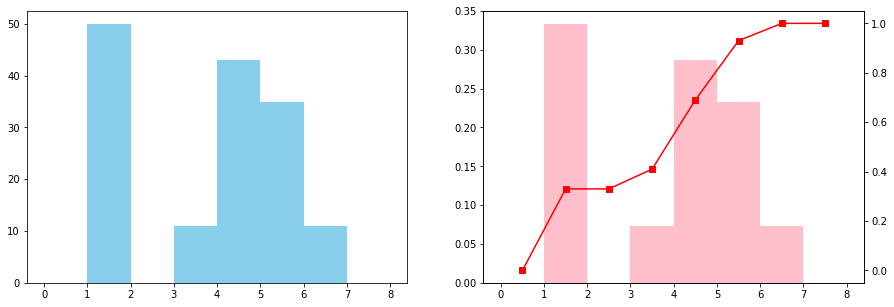

In [5]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 꽃잎 길이 데이터 추출
iris = load_iris() 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
petal_length = df[['petal length (cm)']]
# display(petal_length)



# 도수분포표 만들기
## 계급 설정
# print(petal_length.describe().round(2))  # 꽃잎길이 최솟값, 최댓값 확인
freq, step = np.histogram(petal_length, bins = 8, range = (0 ,8))
step = [f'{i} ~ {i+1} cm' for i in range(0,8)]
# print(freq, step)
petal_len_df = pd.DataFrame({'freq': freq }, pd.Index( step , name = 'petal length'))
display(petal_len_df)


# 히스토그램 그리기
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(petal_length, bins = 8, range = (0,8), color = 'skyblue')



# 상대도수 만들기
petal_len_df['relative freq'] = petal_len_df['freq']/petal_len_df['freq'].sum()

# 누적상대도수 만들기
petal_len_df['cumulative relative freq'] = petal_len_df['relative freq'].cumsum().round(2)
display(petal_len_df)


# 히스토그램과 누적상대도수 선그래프 그리기
ax2 = fig.add_subplot(1,2,2)
ax3 = ax2.twinx()

## 히스토그램
weights = np.ones_like(petal_length)/len(petal_length)
ax2.hist(petal_length, bins = 8, range = (0,8), weights = weights, color = 'pink')

### x축값: 계급값
class_value = [ (i+(i+1))/2 for i in range(0, 8)]
### y축값: 누적상대도수 
cumsum = petal_len_df['cumulative relative freq']

## 꺾은선 그래프
ax3.plot(class_value, cumsum, marker = 's', color = 'red')


plt.show()


#### 이차원 데이터 생성해(1000개) 다음을 수행하세요 
- 공분산 및 상관계수를 구하세요.
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요. 

x,y의 공분산: 244115.3
x,y의 상관계수: 0.93


B1 계수: 2.93
B0 계수: 396.68


회귀식: y = 396.68 +  2.93x




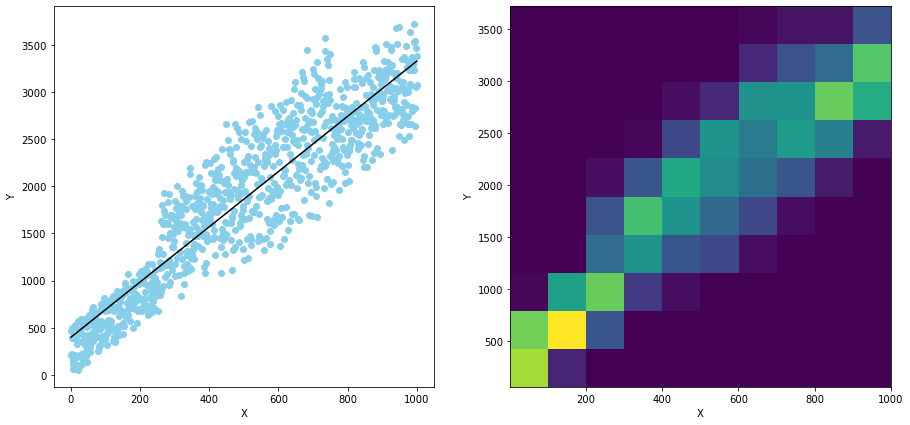

In [79]:
# 랜덤 데이터 생성
## 방법1 ============================================================

# x = np.arange(1,1001)
# y = np.random.randint(1,3000,1000)

# # 데이터의 경향성 만들기 (y = 3x에 가깝게..)
# for i in np.random.randint(0,300,300):
#     y[i]= x[i] * 3 - np.random.randint(1,400,1)    
# for i in np.random.randint(0,300,300):
#     y[i]= x[i] * 3 + np.random.randint(1,400,1)    
# for i in np.random.randint(300,750,300):
#     y[i]= x[i] * 3 - np.random.randint(1,800,1)   
# for i in np.random.randint(300,750,300):
#     y[i]= x[i] * 3 + np.random.randint(1,800,1)
# for i in np.random.randint(750,1000,300):
#     y[i]= x[i] * 3 - np.random.randint(1,400,1)
# for i in np.random.randint(750,1000,300):
#     y[i]= x[i] * 3 + np.random.randint(1,400,1)

    
## 방법2 ============================================================

x = np.arange(1,1001)
y = x.copy()
for i in range(1000):
    if i<250 or i>750:
        x_move = np.random.uniform(2.5,3.5)
        y_move = np.random.randint(0,500)
    else: 
        x_move = np.random.uniform(2.2,3.8)
        y_move = np.random.randint(0,1000)
    y[i] = x[i]*x_move + y_move


    
    
# 공분산, 상관계수 구하기
cov_xy = np.cov(x,y, ddof = 0)[0,1].round(2)
r_xy = np.corrcoef(x, y)[0,1].round(2)

print(f'x,y의 공분산: {cov_xy}')
print(f'x,y의 상관계수: {r_xy}')
print('\n')



# 산점도 그리기
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x, y, color = 'skyblue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')



# 회귀선 추가
## B0, B1 계수 구하기
poly_fit = np.polyfit(x, y, 1)
print(f'B1 계수: {poly_fit[0]:.2f}')
print(f'B0 계수: {poly_fit[1]:.2f}')
print('\n')
print(f'회귀식: y = {poly_fit[1]:.2f} +  {poly_fit[0]:.2f}x')
print('\n')

## B0 + B1*x 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)

## x축
xs = np.linspace(x.min(), x.max())
## y축
ys = poly_1d(xs)
ax1.plot(xs, ys, color = 'black' )




# 히트맵 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.hist2d(x, y)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')



plt.show()

In [37]:
# 데이터 만들기
import random
# 경향성 만들기 y = 0.8x + 10 이런꼴
en_scores = np.random.randn(100)*10 + 70
ma_scores = en_scores # 일단 복붙해서 대강 만들기

for i in range(100):
    x = round(random.uniform(0.5,0.9),2)
    y = np.random.randint(10,15)
    ma_scores[i] = en_scores[i]*x + y # 경향을 랜덤으로 만들되, 설정한 범위 내에서 만들기

### 앤스컴의 예

In [24]:
# npy 형식으로 저장된 Numpy array 불러오기

import numpy as np
anscombe_data = np.load('ch3_anscombe.npy')

print(anscombe_data.shape)  # 11행 2열이 4개
print(anscombe_data)

(4, 11, 2)
[[[10.    8.04]
  [ 8.    6.95]
  [13.    7.58]
  [ 9.    8.81]
  [11.    8.33]
  [14.    9.96]
  [ 6.    7.24]
  [ 4.    4.26]
  [12.   10.84]
  [ 7.    4.82]
  [ 5.    5.68]]

 [[10.    9.14]
  [ 8.    8.14]
  [13.    8.74]
  [ 9.    8.77]
  [11.    9.26]
  [14.    8.1 ]
  [ 6.    6.13]
  [ 4.    3.1 ]
  [12.    9.13]
  [ 7.    7.26]
  [ 5.    4.74]]

 [[10.    7.46]
  [ 8.    6.77]
  [13.   12.74]
  [ 9.    7.11]
  [11.    7.81]
  [14.    8.84]
  [ 6.    6.08]
  [ 4.    5.39]
  [12.    8.15]
  [ 7.    6.42]
  [ 5.    5.73]]

 [[ 8.    6.58]
  [ 8.    5.76]
  [ 8.    7.71]
  [ 8.    8.84]
  [ 8.    8.47]
  [ 8.    7.04]
  [ 8.    5.25]
  [19.   12.5 ]
  [ 8.    5.56]
  [ 8.    7.91]
  [ 8.    6.89]]]


In [31]:
import pandas as pd

stats_df = pd.DataFrame(index = ['X_mean', 'X_variance', 'Y_mean','Y_variance', 'X&Y_correlation','X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX): .2f}',
                              f'{np.var(dataX): .2f}',
                              f'{np.mean(dataY): .2f}',
                              f'{np.var(dataY): .2f}',
                              f'{np.corrcoef(dataX,dataY)[0,1]: .2f}',
                              f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
    
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


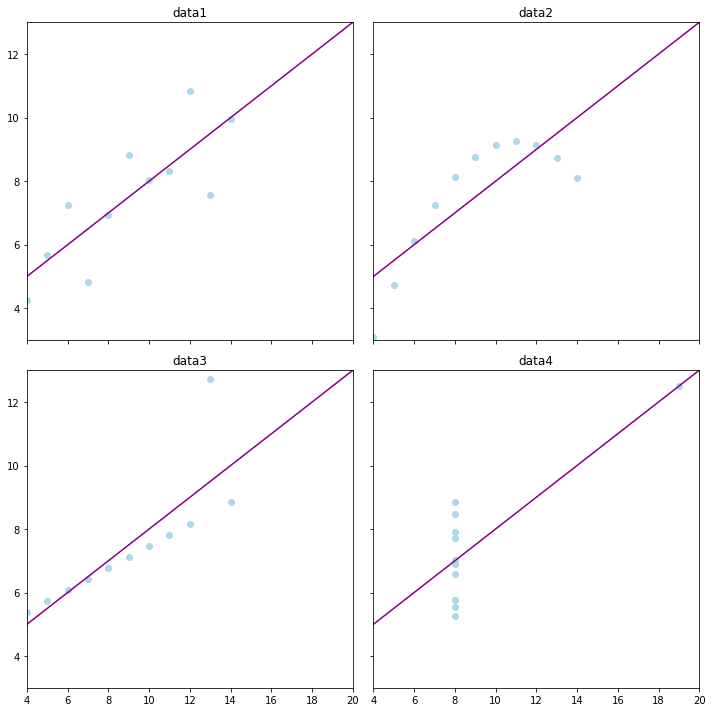

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), 
                         sharex = True, sharey = True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax = axes[i // 2, i % 2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1], color = 'lightblue')
    ax.plot(xs, ys, color = 'purple')
    
plt.tight_layout()
plt.show()

## 추측통계의 기본

### 모집단과 표본

- 모집단: 추측하고 싶은 관측 대상 전체
- 표본: 추측에 사용하는 관측 대상의 일부분
- 표본추출: 모집단에서 표본을 골라내는 일
- 모수: 모집단의 평균, 분산, 상관계수 등
- 표본통계량: 표본을 바탕으로 계산한 평균이나 분산, 상관계수 등 
- 추정량: 표본통계량으로 모수를 추측할 때 표본통계량



- 무작위추출: 임의로 표본을 추출하는 방법  
    - 복원추출: 여러차례 동일한 표본 선택 가능 -> <b>np.random.choice(list, n)</b>
    - 비복원추출: 동일한 표본은 한 번만 선택 가능 -> <b>np.random.choice(list, n, replace = False)</b>
    - 반복 무작위추출 시, 통계량이 달라지는 것 방지 -> np.random.seed(0)
        - 위치에 따라서 고정되는 값이 달라짐

In [89]:
import numpy as np

for i in range(5):
    print(np.random.choice([1,2,3,4,5],2))

[2 3]
[4 3]
[4 1]
[5 2]
[5 3]


In [99]:
np.random.seed(0)

for i in range(5):
    print(np.random.choice([1,2,3,4,5],2))

[5 1]
[4 4]
[4 2]
[4 3]
[5 1]


In [100]:
for i in range(5):
    np.random.seed(0)
    print(np.random.choice([1,2,3,4,5],2))

[5 1]
[5 1]
[5 1]
[5 1]
[5 1]


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ch4_scores400.csv')
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [123]:
np.random.seed(0)

scores = np.array(df['score'])
sample = np.random.choice(scores, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [124]:
sample.mean()

70.4

In [125]:
scores.mean()

69.53

In [155]:
scores = np.array(df['score'])
sample = np.random.choice(scores, 20)
sample

array([86, 65, 70, 64, 87, 76, 87, 77, 52, 76, 68, 75, 52, 65, 96, 61, 54,
       55, 58, 52], dtype=int64)

### 확률모형
- 확률변수: 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
    - 사건이 서로 배반이라면, 그 중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같음
- 확률분포: 확률변수가 어떻게 움직이는지를 나타냄
    - 각 요소의 확률을 지정해주는 함수 np.random.choice(변수, p = 확률정의 변수)

In [159]:
# 주사위 눈과 각 요소가 나올 확률 지정

dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [169]:
# 100개 랜덤추출

num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)
sample

array([5, 4, 1, 5, 5, 1, 6, 5, 4, 3, 6, 4, 4, 5, 6, 4, 6, 5, 4, 5, 4, 5,
       5, 6, 4, 1, 6, 4, 6, 5, 3, 5, 6, 2, 3, 2, 6, 1, 2, 3, 6, 3, 4, 4,
       5, 6, 6, 2, 5, 6, 6, 3, 6, 3, 6, 1, 2, 5, 4, 2, 6, 6, 3, 4, 5, 5,
       6, 2, 1, 5, 4, 3, 2, 2, 6, 4, 4, 1, 4, 5, 5, 6, 5, 4, 4, 6, 6, 3,
       5, 5, 4, 5, 2, 5, 1, 6, 5, 6, 1, 6])

In [170]:
# 각 계급별 도수 및 상대도수 측정
freq, _ = np.histogram(sample, bins = 6, range = (1,7))

pd.DataFrame({'freq': freq, 'relative freq': freq/num_trial}, 
              pd.Index(list(range(1,7)), name = 'dice'))

,freq,relative freq
dice,,
1,9,0.09
2,10,0.10
3,10,0.10
4,20,0.20
5,25,0.25
6,26,0.26


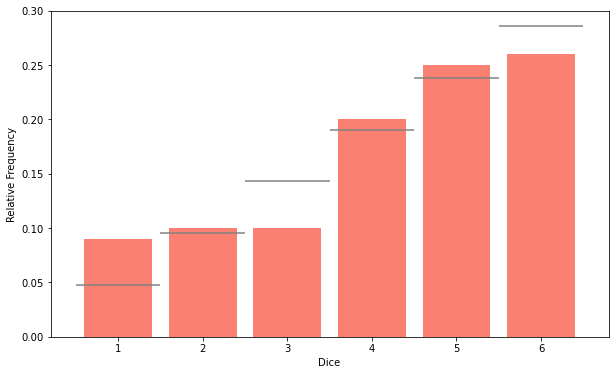

In [192]:
# 히스토그램 그리기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# 히스토그램 그리기
ax.hist(sample, bins = 6, range = (1,7), density = True, rwidth = 0.8, color = 'salmon')
# ax.hist(sample, bins = 6, range = (1,7), weights = np.ones_like(sample)/len(sample), rwidth = 0.8)

# 실제 확률분포 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), color = 'gray')


# 막대그래프의 [1.5,2.5,...,6.5]에 눈금표시하기
ax.set_xticks(np.linspace(1.5,6.5,6))  # 눈금 위치
ax.set_xticklabels(np.arange(1,7)) # 눈금 내용
ax.set_xlabel('Dice')
ax.set_ylabel('Relative Frequency')

plt.show()

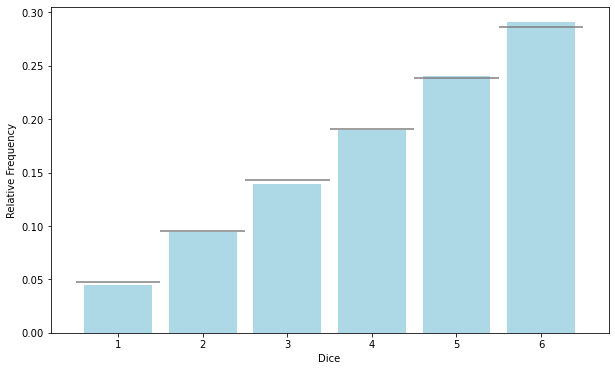

In [201]:
# 10000개 랜덤추출

num_trial2 = 10000
sample2 = np.random.choice(list(range(1,7)), num_trial2, p = prob)


# 시각화
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# 히스토그램 그리기
ax.hlines(prob, np.arange(1,7), np.arange(2,8), color = 'gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('Dice')
ax.set_ylabel('Relative Frequency')
plt.show()

시행횟수를 늘릴 수록 상대도수가 확률분포에 수렴해감

### 추측통계의 확률
- 무작위추출은 확률분포를 따르는 확률변수의 시행임
- 히스토그램의 x 구간(점수)을 세분화하고 y인 상대도수(해당 점수를 얻은 사람 수)를 y축으로 두면, 이 히스토그램을 모집단의 확률분포로 간주할 수 있음 

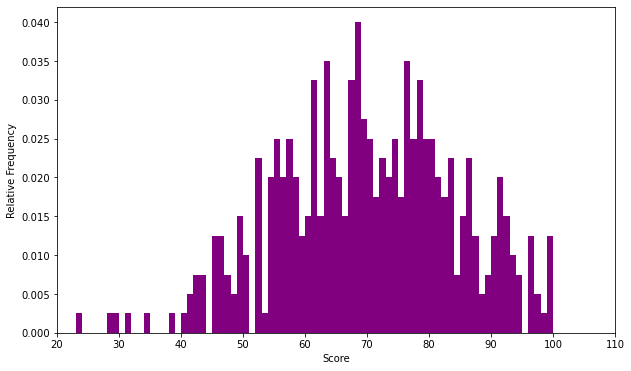

In [214]:
# 400개의 성적을 가지고 히스토그램(확률분포) 만들기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# 계급폭을 1로 하는 히스토그램 그리기
ax.hist(scores, bins = 100, range = (0,100), density = True, color = 'purple')

# x, y축 구간 제한
ax.set_xlim(20,110)
ax.set_ylim(0,0.042)

ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')

plt.show()

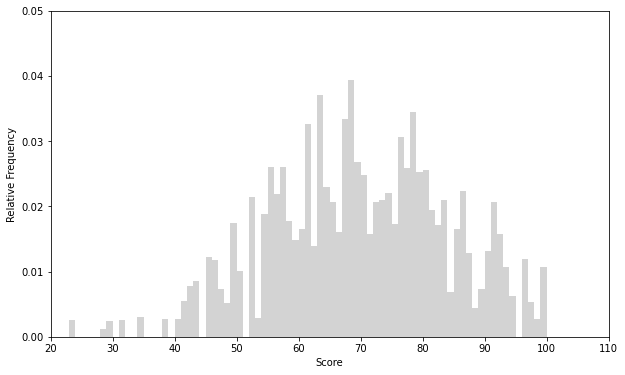

In [221]:
# 점수 표본의 크기를 늘리기

sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.hist(sample, bins = 100, range = (0,100), density = True, color = 'lightgray')

ax.set_xlim(20,110)
ax.set_ylim(0,0.05)
ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')

plt.show()

표본수를 늘려도 히스토그램의 실제 점수 분포에 매우 가까운 형태로 나타남

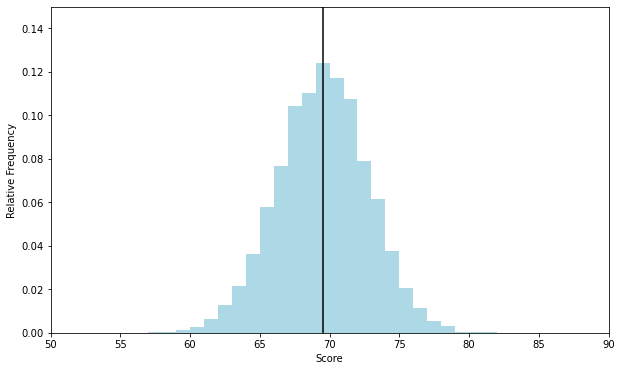

In [230]:
# 무작위추출로 표본크기가 20인 표본을 추출하여 표본평균을 계산

sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins = 100, range = (0,100), density = True, color = 'lightblue')

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1, color ='black')

ax.set_xlim(50,90)
ax.set_ylim(0,0.15)
ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')

plt.show()

- 표본평균은 산포도 그자체로, 모평균을 중심으로 분포하는 것을 알 수 있음
- 무작위추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 됨

### 과제

#### 적절한 데이터를 생성하고 polyfit을 이용하여 2,3차 방정식을 만든 후 산점도 및 회귀식을 시각화하여 의미를 해석하기

2차 회귀 방정식 Y = B0 + B1x + B2x^2: 

Y = 0.68+3.45X+-0.53X^2
3차 회귀 방정식 Y = B0 + B1x + B2x^2 + B3x^3: 

Y = 1.15+1.15X+1.71X^2 + -0.58X^3


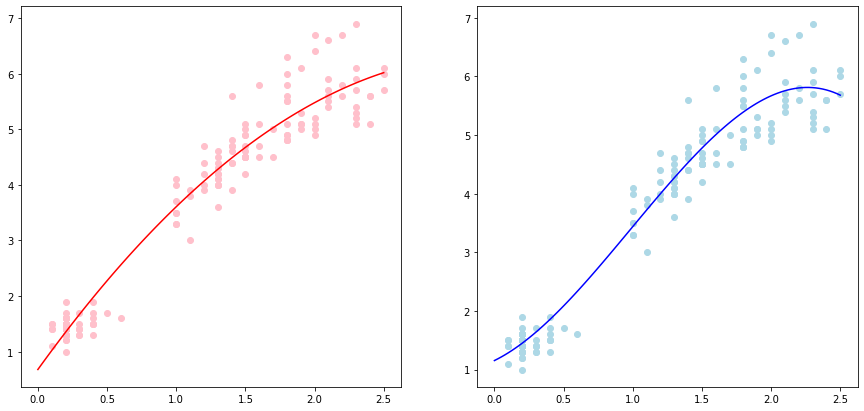

In [269]:
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 꽃잎 길이 데이터 추출
iris = load_iris() 
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
petal = df[['petal length (cm)', 'petal width (cm)']]
# display(petal)
# print(petal.describe())


print('=======================================================')
# 2차원 회귀방정식 만들기
## 회귀계수 생성
poly2d = np.polyfit(petal.iloc[:,1], petal.iloc[:,0], 2)

B0, B1, B2 = poly2d[2], poly2d[1], poly2d[0]

## 회귀방정식
print(f'2차 회귀 방정식 Y = B0 + B1x + B2x^2: \n')
print(f'Y = {B0:.2f}+{B1:.2f}X+{B2:.2f}X^2')


# 시각화
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(1,2,1)

## 산점도 그리기
ax1.scatter(petal.iloc[:,1], petal.iloc[:,0], color = 'pink')

## 회귀선 그리기
x = np.linspace(0,2.5,100)
y_pred = B0 + B1 * x + B2 * x**2
ax1.plot(x, y_pred, color = 'red')


print('=======================================================')
# 3차원 회귀방정식 만들기
## 회귀계수 생성
poly3d = np.polyfit(petal.iloc[:,1],petal.iloc[:,0], 3)

B0, B1, B2, B3 = poly3d[2], poly3d[2], poly3d[1], poly3d[0]

## 회귀방정식 생성
print(f'3차 회귀 방정식 Y = B0 + B1x + B2x^2 + B3x^3: \n')
print(f'Y = {B0:.2f}+{B1:.2f}X+{B2:.2f}X^2 + {B3:.2f}X^3')

# 시각화
ax2 = fig.add_subplot(1,2,2)

## 산점도 그리기
ax2.scatter(petal.iloc[:,1], petal.iloc[:,0], color = 'lightblue')

## 회귀선 그리기
x = np.linspace(0,2.5,100)
y_pred = B0 + B1 * x + B2 * x**2 + B3 * x**3
ax2.plot(x, y_pred, color = 'blue')

print('=======================================================')

#### 어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다 라는 주장을 사례를 만들어서 설득력있게 설명하기

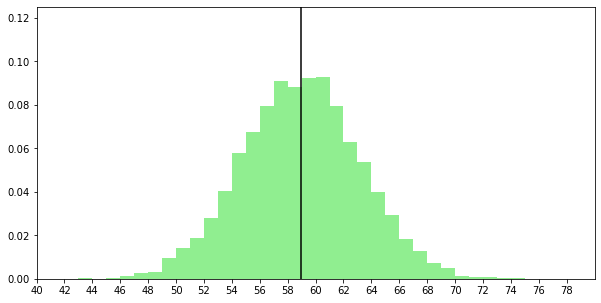

In [306]:
np.random.seed(0)

scores = np.random.randint(20,100, 400)

f'랜덤 생성된 데이터의 평균(모평균):{scores.mean()}'

# 10000개의 표본의 평균 생성
scores_n = [np.random.choice(scores, 30).mean() for _ in range(10000)]

# 시각화
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

## 히스토그램
ax.hist(scores_n, bins = 80, range = (20,100), density = True, color = 'lightgreen')

## 모평균 수직선
ax.vlines(scores.mean(), 0,1, color = 'black')

ax.set_xlim(40,80)
ax.set_ylim(0,0.125)
ax.set_xticks(np.arange(40,80,2))

plt.show()

# - 표본평균은 산포도 그자체로, 모평균을 중심으로 분포하는 것을 알 수 있음
# - 무작위추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 됨